### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn import datasets

### Part I - Importing the Dataset

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail(5)

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Part II - Select setosa and versicolor

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)

       0    1    2    3                4
0    5.1  3.5  1.4  0.2      Iris-setosa
1    4.9  3.0  1.4  0.2      Iris-setosa
2    4.7  3.2  1.3  0.2      Iris-setosa
3    4.6  3.1  1.5  0.2      Iris-setosa
4    5.0  3.6  1.4  0.2      Iris-setosa
5    5.4  3.9  1.7  0.4      Iris-setosa
6    4.6  3.4  1.4  0.3      Iris-setosa
7    5.0  3.4  1.5  0.2      Iris-setosa
8    4.4  2.9  1.4  0.2      Iris-setosa
9    4.9  3.1  1.5  0.1      Iris-setosa
10   5.4  3.7  1.5  0.2      Iris-setosa
11   4.8  3.4  1.6  0.2      Iris-setosa
12   4.8  3.0  1.4  0.1      Iris-setosa
13   4.3  3.0  1.1  0.1      Iris-setosa
14   5.8  4.0  1.2  0.2      Iris-setosa
15   5.7  4.4  1.5  0.4      Iris-setosa
16   5.4  3.9  1.3  0.4      Iris-setosa
17   5.1  3.5  1.4  0.3      Iris-setosa
18   5.7  3.8  1.7  0.3      Iris-setosa
19   5.1  3.8  1.5  0.3      Iris-setosa
20   5.4  3.4  1.7  0.2      Iris-setosa
21   5.1  3.7  1.5  0.4      Iris-setosa
22   4.6  3.6  1.0  0.2      Iris-setosa
23   5.1  3.3  1

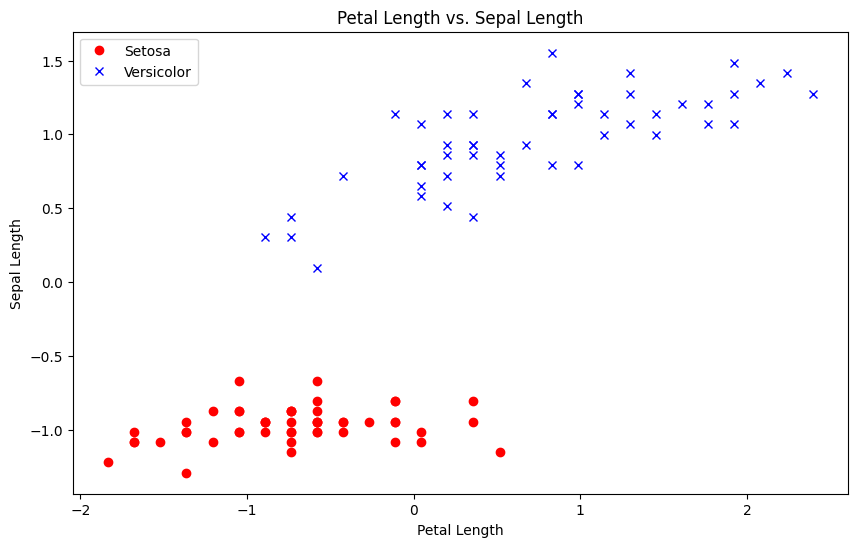

In [4]:
# Select setosa and versicolor sepal and petal length features
X = df.loc[(df[4]=='Iris-setosa') | (df[4]=='Iris-versicolor'), [0, 2]].values
y = df.loc[(df[4]=='Iris-setosa') | (df[4]=='Iris-versicolor'), 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# Feature Scaling
Xp = np.copy(X)
Xp[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
Xp[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# Plot the petal length vs. sepal length features
fig = plt.figure(figsize=(10,6))
plt.plot(Xp[:, 0][y == 0], Xp[:, 1][y == 0], 'ro', label='Setosa')
plt.plot(Xp[:, 0][y == 1], Xp[:, 1][y == 1], 'bx', label='Versicolor')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.title('Petal Length vs. Sepal Length')
plt.legend()

### Part III - Implementation of Adaline

In [5]:
# Activation function
# z - net input
def activation_func(z):
    return 1.0 if (abs(z) > 0.5) else 0.0

def net_input_func(w_T, x):
    return np.dot(w_T, x);   

In [6]:
# Training the adaline
def adaline(X, y, lr, tol):
    m, n = X.shape
    theta = np.zeros((n+1, 1))
    cost_list = []
    
    while True:
        errors = []
        for idx, x_i in enumerate(X):
            # Adds 1 as bias term to the input data
            # Converts to 2D column vector
            x_i = np.insert(x_i, 0, 1).reshape(-1, 1)
            # Compute predictions
            y_pred = activation_func(net_input_func(theta.T, x_i))
            # Compute error
            error = (y[idx] - y_pred)
            # Update weights
            theta += lr * error * x_i
            errors.append(error)

        cost = np.mean(np.array(errors) ** 2)
        cost_list.append(cost)

        if cost_list[-1] < tol:
            break

    return theta, cost_list

In [7]:
def plot_decision_boundary(X, theta):
    x1 = [min(X[:, 0]), max(X[:, 0])]
    m = -theta[1] / theta[2]
    c = -theta[0] / theta[2]
    x2 = m * x1 + c

    fig = plt.figure(figsize=(10,6))
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'ro', label='Setosa')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bx', label='Versicolor')
    plt.plot(x1, x2, 'y-')
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')
    plt.title('Adaline Algorithm')
    plt.legend()

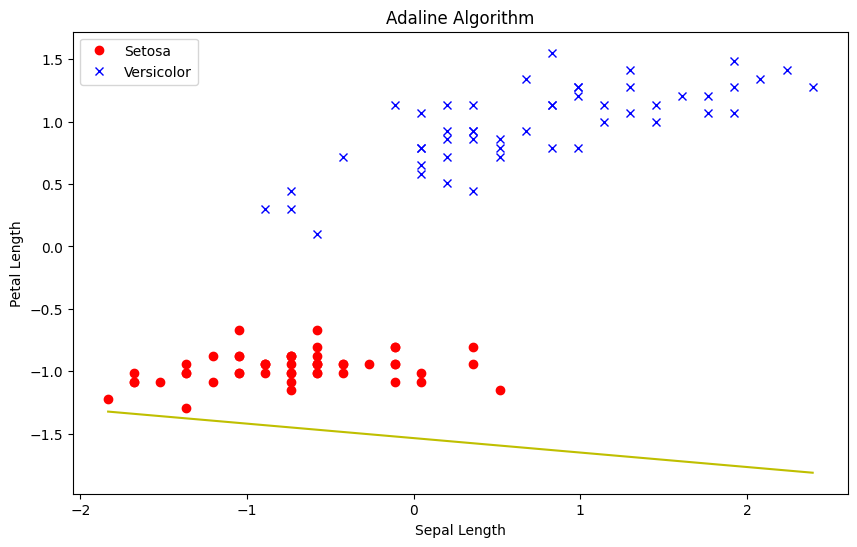

In [8]:
# Initialize variables
learning_rate = 0.01
tolerance = 0.015

# Train ADALINE and get cost history
theta, cost_list = adaline(Xp, y, learning_rate, tolerance)
plot_decision_boundary(Xp, theta)

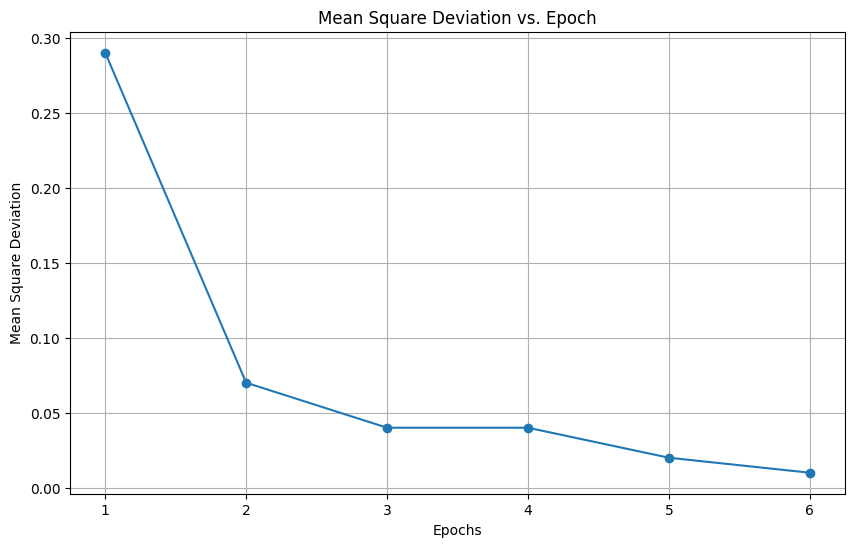

In [9]:
# Plot Mean Square Deviation vs. Epoch
fig = plt.figure(figsize=(10,6))
plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Deviation')
plt.title('Mean Square Deviation vs. Epoch')
plt.grid()

In [10]:
# Predict function for ADALINE
def predict(X, theta):
    return np.dot(X, theta[1:]) + theta[0]

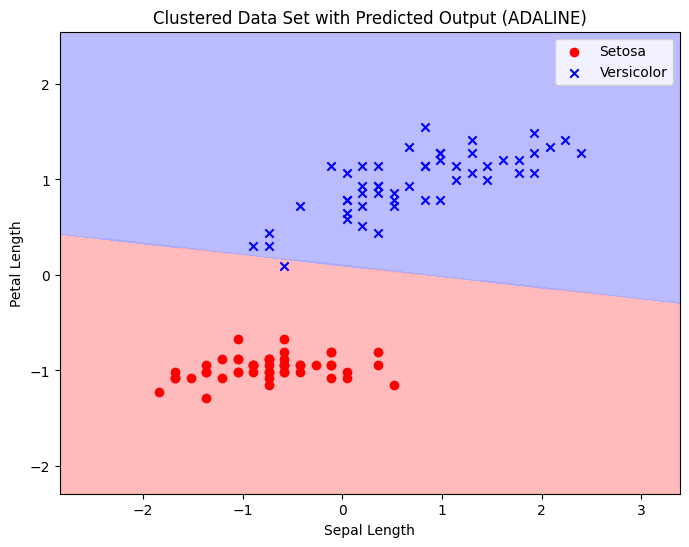

In [11]:
from matplotlib.colors import ListedColormap

# Define a colormap
cmap = ListedColormap(['#FFAAAA', '#AAAAFF'])

# Create a mesh grid for the colormap plot
x_min, x_max = Xp[:, 0].min() - 1, Xp[:, 0].max() + 1
y_min, y_max = Xp[:, 1].min() - 1, Xp[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict class labels for each point in the mesh grid
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_predictions = predict(mesh_points, theta)

# Apply the custom activation function to the predictions
mesh_predictions = np.array([activation_func(z) for z in mesh_predictions])

# Reshape the predictions to match the mesh grid shape
mesh_predictions = mesh_predictions.reshape(xx.shape)

# Create a 2D-colormap plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, mesh_predictions, cmap=cmap, alpha=0.8)

# Scatter plot of the actual data points
plt.scatter(Xp[:, 0][y == 0], Xp[:, 1][y == 0], c='r', marker='o', label='Setosa')
plt.scatter(Xp[:, 0][y == 1], Xp[:, 1][y == 1], c='b', marker='x', label='Versicolor')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Clustered Data Set with Predicted Output (ADALINE)')
plt.legend()